## Contrabands in Rhode Island Police Activity
### This is an analysis of THE STANFORD OPEN POLICING PROJECT Data for the State of Rhode Island where the contraband_found column is not null.


In [9]:
#import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [17]:
#open ri file
ri = pd.read_csv('/Users/ecuerbo/python/pyprac/data/ri.csv')

#subset files where contraband_found is not null
df = ri.loc[ri.contraband_found.isna()==False]

In [18]:
#check contra columns
df.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne', 'raw_SearchResultTwo',
       'raw_SearchResultThree'],
      dtype='object')

In [19]:
#check null values
df.isna().sum()

raw_row_number               0
date                         0
time                         0
zone                         0
subject_race                 0
subject_sex                  0
department_id                0
type                         0
arrest_made                  0
citation_issued              0
warning_issued               0
outcome                    431
contraband_found             0
contraband_drugs          1774
contraband_weapons        5967
contraband_alcohol       16545
contraband_other             0
frisk_performed              0
search_conducted             0
search_basis                 0
reason_for_search            0
reason_for_stop              0
vehicle_make              5020
vehicle_model             8571
raw_BasisForStop             0
raw_OperatorRace             0
raw_OperatorSex              0
raw_ResultOfStop             0
raw_SearchResultOne          0
raw_SearchResultTwo      16943
raw_SearchResultThree    17594
dtype: int64

In [8]:
#check datatypes
contra.dtypes

raw_row_number            int64
date                     object
time                     object
zone                     object
subject_race             object
subject_sex              object
department_id            object
type                     object
arrest_made              object
citation_issued          object
warning_issued           object
outcome                  object
contraband_found         object
contraband_drugs         object
contraband_weapons       object
contraband_alcohol       object
contraband_other         object
frisk_performed          object
search_conducted           bool
search_basis             object
reason_for_search        object
reason_for_stop          object
vehicle_make             object
vehicle_model            object
raw_BasisForStop         object
raw_OperatorRace         object
raw_OperatorSex          object
raw_ResultOfStop         object
raw_SearchResultOne      object
raw_SearchResultTwo      object
raw_SearchResultThree    object
dtype: o

<AxesSubplot:>

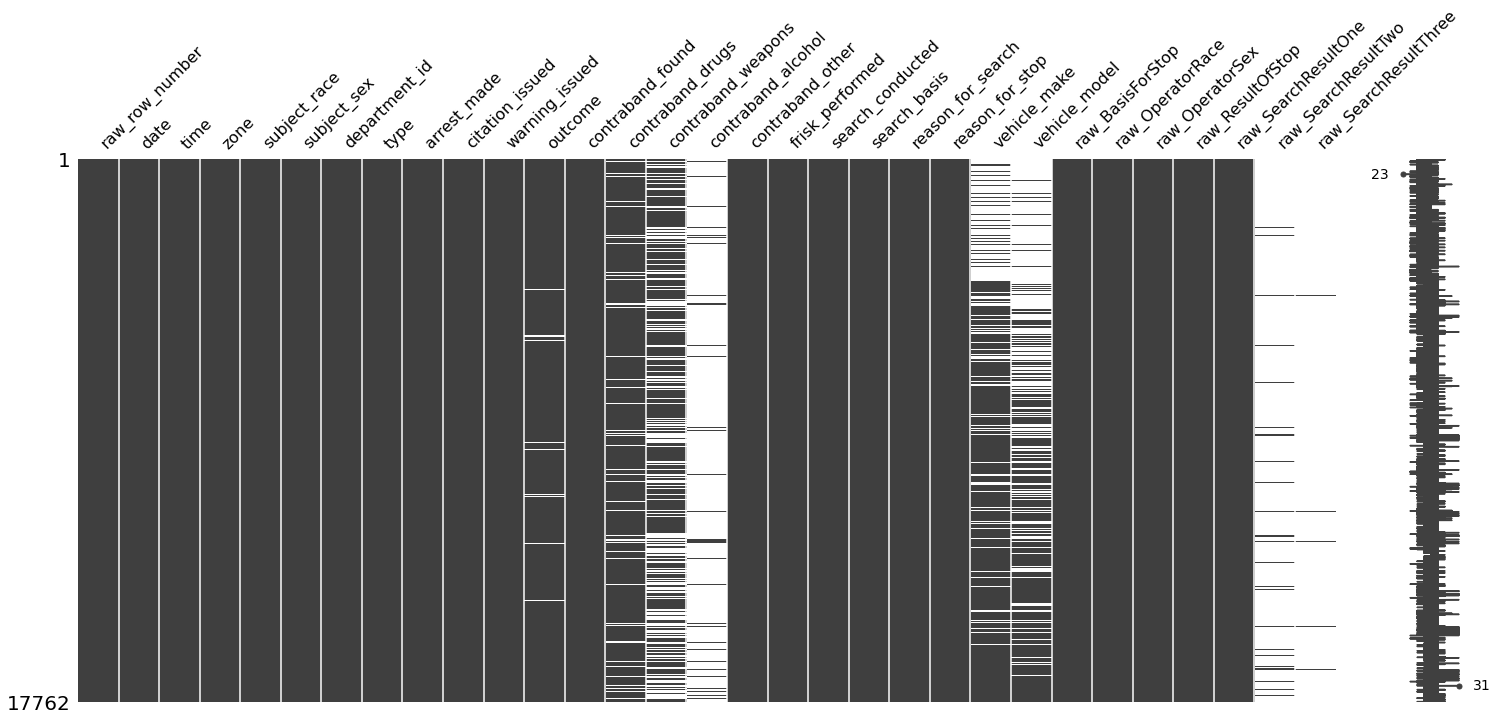

In [20]:
#view missing value matrix
msno.matrix(df)

In [60]:
#drop not needed columns
to_drop = ['raw_row_number','contraband_found','frisk_performed','type','vehicle_make','vehicle_model','reason_for_search', 'raw_SearchResultOne', 'raw_SearchResultTwo', 'raw_SearchResultThree']
cat = ['zone', 'subject_race', 'subject_sex', 'department_id','arrest_made', 'citation_issued', 'warning_issued', 'outcome',]
boo = ['arrest_made','citation_issued']
contra=df.drop(to_drop, axis=1)
contra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17762 entries, 297 to 509631
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                17762 non-null  object
 1   time                17762 non-null  object
 2   zone                17762 non-null  object
 3   subject_race        17762 non-null  object
 4   subject_sex         17762 non-null  object
 5   department_id       17762 non-null  object
 6   arrest_made         17762 non-null  object
 7   citation_issued     17762 non-null  object
 8   warning_issued      17762 non-null  object
 9   outcome             17331 non-null  object
 10  contraband_drugs    15988 non-null  object
 11  contraband_weapons  11795 non-null  object
 12  contraband_alcohol  1217 non-null   object
 13  contraband_other    17762 non-null  object
 14  search_conducted    17762 non-null  bool  
 15  search_basis        17762 non-null  object
 16  reason_for_stop    

In [83]:
#change to categorical values
contra[cat] = contra[cat].astype('category')

In [84]:
#check value counts
for x in contra.columns:
    print(contra[x].value_counts(normalize=True, dropna=False))

X4    0.360883
K3    0.276095
K2    0.143903
X3    0.127294
K1    0.083324
X1    0.008501
Name: zone, dtype: float64
white                     0.561198
black                     0.242653
hispanic                  0.179541
asian/pacific islander    0.015764
other                     0.000844
Name: subject_race, dtype: float64
male      0.861558
female    0.138442
Name: subject_sex, dtype: float64
500    0.310438
300    0.217093
200    0.101621
900    0.097230
300    0.072965
900    0.052528
600    0.047686
500    0.038228
600    0.024828
200    0.016777
0      0.015539
000    0.004729
502    0.000169
004    0.000056
408    0.000056
505    0.000056
Name: department_id, dtype: float64
False    0.651672
True     0.348328
Name: arrest_made, dtype: float64
True     0.591882
False    0.408118
Name: citation_issued, dtype: float64
False    0.964475
True     0.035525
Name: warning_issued, dtype: float64
citation    0.591882
arrest      0.348328
warning     0.035525
NaN         0.024265
Name: ou

In [81]:
#combine date and time into 1 column
contra['dt'] = contra['date'] + " " + contra['time']
contra = contra.set_index('dt')
contra = contra.drop(['date', 'time'], axis=1)
contra.index = pd.to_datetime(contra.index)

In [82]:
contra.head()

,zone,subject_race,subject_sex,department_id,arrest_made,citation_issued,warning_issued,outcome,contraband_drugs,contraband_weapons,contraband_alcohol,contraband_other,search_conducted,search_basis,reason_for_stop,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop
dt,,,,,,,,,,,,,,,,,,,
2005-12-06 16:29:00,K2,black,male,900,False,True,False,citation,False,False,NaN,False,True,other,Registration Violation,RV,B,M,M
2005-12-01 20:00:00,K3,black,male,300,False,True,False,citation,False,False,NaN,False,True,probable cause,Other Traffic Violation,OT,B,M,M
2005-12-01 20:25:00,K3,black,male,300,False,True,False,citation,False,False,NaN,False,True,other,Registration Violation,RV,B,M,M
2005-12-01 21:05:00,K3,black,female,300,False,True,False,citation,False,False,NaN,False,True,other,Registration Violation,RV,B,F,M
2005-12-07 02:38:00,K3,white,male,300,True,False,False,arrest,False,False,NaN,False,True,other,Speeding,SP,W,M,P


In [86]:
contra.columns

Index(['zone', 'subject_race', 'subject_sex', 'department_id', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'search_conducted', 'search_basis', 'reason_for_stop',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop'],
      dtype='object')

In [93]:
cont = contra.loc[:,'contraband_drugs':'contraband_other']

In [94]:
cont['contra_found']=

,contraband_drugs,contraband_weapons,contraband_alcohol,contraband_other
dt,,,,
2005-12-06 16:29:00,False,False,NaN,False
2005-12-01 20:00:00,False,False,NaN,False
2005-12-01 20:25:00,False,False,NaN,False
2005-12-01 21:05:00,False,False,NaN,False
2005-12-07 02:38:00,False,False,NaN,False


In [99]:
props = contra.groupby('subject_sex')['subject_race'].value_counts(normalize=True)
props

subject_sex                        
female       white                     0.641724
             black                     0.217161
             hispanic                  0.131761
             asian/pacific islander    0.008947
             other                     0.000407
male         white                     0.548259
             black                     0.246749
             hispanic                  0.187218
             asian/pacific islander    0.016859
             other                     0.000915
Name: subject_race, dtype: float64

In [102]:
#test for signifcant difference in subject_sex and subject race
import pingouin as pg
expected, observed, stats = pg.chi2_independence(data=contra, x='subject_sex', y='subject_race')
print(stats)

                 test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000   85.975116  4.0  9.420427e-18  0.069573   
1        cressie-read  0.666667   87.069042  4.0  5.519435e-18  0.070014   
2      log-likelihood  0.000000   89.582937  4.0  1.614719e-18  0.071018   
3       freeman-tukey -0.500000   91.787728  4.0  5.491161e-19  0.071886   
4  mod-log-likelihood -1.000000   94.304557  4.0  1.601926e-19  0.072865   
5              neyman -2.000000  100.447388  4.0  7.899465e-21  0.075201   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  


/opt/anaconda3/lib/python3.9/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/opt/anaconda3/lib/python3.9/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


<AxesSubplot:xlabel='subject_race'>

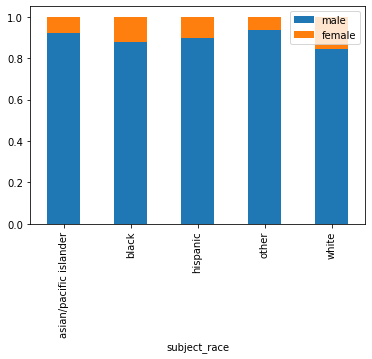

In [104]:
#for alpha= 0.2, thee is a significant difference between subject race and gender.
#swapping the variables
props = contra.groupby('subject_race')['subject_sex'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)


<AxesSubplot:xlabel='subject_sex'>

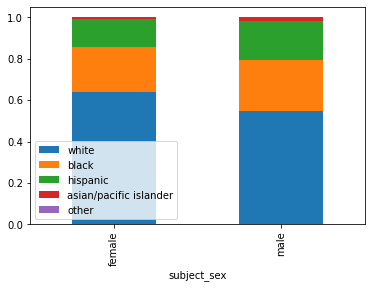

In [105]:
contra.groupby('subject_sex')['subject_race'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [106]:
#swapping the variables,
expected, observed, stats = pg.chi2_independence(data=contra, x='subject_race', y='subject_sex')
print(stats)

                 test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000   85.975116  4.0  9.420427e-18  0.069573   
1        cressie-read  0.666667   87.069042  4.0  5.519435e-18  0.070014   
2      log-likelihood  0.000000   89.582937  4.0  1.614719e-18  0.071018   
3       freeman-tukey -0.500000   91.787728  4.0  5.491161e-19  0.071886   
4  mod-log-likelihood -1.000000   94.304557  4.0  1.601926e-19  0.072865   
5              neyman -2.000000  100.447388  4.0  7.899465e-21  0.075201   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  


/opt/anaconda3/lib/python3.9/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/opt/anaconda3/lib/python3.9/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


## from this , we should
#### ASK: Are the variables X and Y independent?
#### NOT: is variable x independent from variable y?